**Question 9** -

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

**Insights to be drawn** -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle.

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015.

● Draw plots to show the distribution between city and electric vehicle type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_data=pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
ev_data.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

**Get all the cars and their types that do not qualify for clean alternative fuel vehicle.**

In [5]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [6]:
#Filtering out cars which do not qualify for clean alternative fuel vehicle
temp_df=ev_data[ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Clean Alternative Fuel Vehicle Eligible']

In [7]:
#Showing unique car models that fall in the list
temp_df[['Make','Model','Electric Vehicle Type']].drop_duplicates()

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
11,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
30249,BMW,745E,Plug-in Hybrid Electric Vehicle (PHEV)
34838,AUDI,A8 E,Plug-in Hybrid Electric Vehicle (PHEV)
58556,BENTLEY,FLYING SPUR,Plug-in Hybrid Electric Vehicle (PHEV)
70023,BMW,745LE,Plug-in Hybrid Electric Vehicle (PHEV)


**Get all TESLA cars with the model year, and model type made in Bothell City.**

In [8]:
#Filtering records of TESLA caqrs that were made in Bothell city
temp_df=ev_data[(ev_data.Make=='TESLA')&(ev_data.City=='Bothell')]

In [9]:
#Shwoing unique TESLA car models that fall in the list
temp_df[['Make','Model','Model Year']].drop_duplicates()

,Make,Model,Model Year
39,TESLA,MODEL 3,2020
217,TESLA,MODEL 3,2022
218,TESLA,MODEL Y,2022
222,TESLA,MODEL 3,2018
292,TESLA,MODEL X,2017
495,TESLA,MODEL Y,2021
503,TESLA,MODEL Y,2023
561,TESLA,MODEL X,2018
881,TESLA,MODEL S,2015
1425,TESLA,MODEL 3,2023


**Get all the cars that have an electric range of more than 100, and were made after 2015.**

In [10]:
#Filtering records of cars that have an electric range of more than 100, and were made after 2015
temp_df=ev_data[(ev_data['Electric Range']>100)&(ev_data['Model Year']>2015)]

In [11]:
#Shwoing unique TESLA car models that fall in the list
temp_df[['Make','Model','Electric Vehicle Type']].drop_duplicates()

,Make,Model,Electric Vehicle Type
0,TESLA,MODEL X,Battery Electric Vehicle (BEV)
2,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
4,TESLA,MODEL S,Battery Electric Vehicle (BEV)
19,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV)
23,NISSAN,LEAF,Battery Electric Vehicle (BEV)
30,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
79,KIA,NIRO,Battery Electric Vehicle (BEV)
190,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV)
252,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV)
254,AUDI,E-TRON,Battery Electric Vehicle (BEV)


**Draw plots to show the distribution between city and electric vehicle type.**

In [12]:
ev_data['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

In [13]:
temp_df=ev_data[['City','Electric Vehicle Type']].drop_duplicates()

C:\Users\Upasana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of countries using different types of Electric Vehicle')

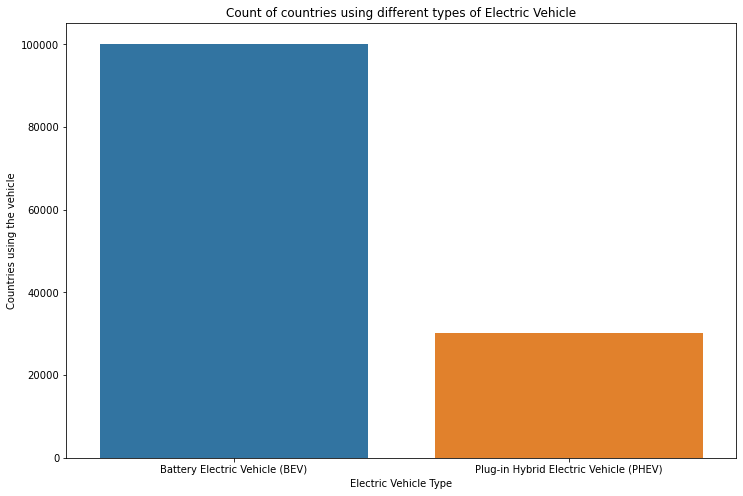

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(ev_data['Electric Vehicle Type'])
plt.ylabel('Countries using the vehicle')
plt.title('Count of countries using different types of Electric Vehicle')